# Using ChexNet pretrained model to extarct features from images to be used in transfer learning for Encoder Decoder model


In [ ]:
#1.25.2
!echo Y | pip uninstall numpy
!pip install numpy==1.23.5

In [6]:
!pip install pandas -q
!pip install matplotlib -q
!pip install nltk seaborn tqdm opencv-python scikit-image scikit-learn -q

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
import re
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [3]:
#@title Import Data
!gdown --fuzzy https://drive.google.com/file/d/1-2PpvgQptoA4vIXxi8mp5VyEVGCPKrDa/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/file/d/1-82fGNo-mi7fGGxaW01X0kEQk5QfLPf_/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/file/d/1-M-6gNXEvtw4zbiGNBDjdmfsksB4vi25/view?usp=drive_link
train_data = pd.read_csv('./Final_Train_Data.csv')
test_data = pd.read_csv('./Final_Test_Data.csv')
cv_data = pd.read_csv('./Final_CV_Data.csv')
train_data=train_data[:3]
test_data=test_data[:2]
cv_data=cv_data[:2]

Downloading...
From: https://drive.google.com/uc?id=1-2PpvgQptoA4vIXxi8mp5VyEVGCPKrDa
To: /content/Final_CV_Data.csv
100% 179k/179k [00:00<00:00, 2.79MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-82fGNo-mi7fGGxaW01X0kEQk5QfLPf_
To: /content/Final_Test_Data.csv
100% 130k/130k [00:00<00:00, 2.48MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-M-6gNXEvtw4zbiGNBDjdmfsksB4vi25
To: /content/Final_Train_Data.csv
100% 919k/919k [00:00<00:00, 7.50MB/s]


In [5]:
print('train data shape : ',train_data.shape)
train_data.head()

train data shape :  (3, 4)


,Person_id,Image1,Image2,Report
0,NLMCXR_png/CXR1108_IM-0075_0,NLMCXR_png/CXR1108_IM-0075-1001.png,NLMCXR_png/CXR1108_IM-0075-2001.png,startseq the lungs are clear and hyperinflated...
1,NLMCXR_png/CXR3650_IM-1813_0,NLMCXR_png/CXR3650_IM-1813-1001.png,NLMCXR_png/CXR3650_IM-1813-2001.png,startseq the heart not enlarged . the bilater...
2,NLMCXR_png/CXR53_IM-2138_0,NLMCXR_png/CXR53_IM-2138-1001.png,NLMCXR_png/CXR53_IM-2138-2001.png,startseq there etremely low lung volumes . th...


In [ ]:
chexNet = densenet.DenseNet121(include_top=False, weights = None,   input_shape=(224,224,3), pooling="avg")
X = chexNet.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=chexNet.input, outputs=X)

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1-VmA6swPxEJ-Cig6pT1Dv7WbyQt7KMOp/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/file/d/1-Yc-lAT4Yyauijj_2onqhynOnyb6FagV/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download
import shutil
shutil.unpack_archive("./NLMCXR_png.tgz","./NLMCXR_png")

In [16]:
def load_image(img_name):
    image = Image.open(img_name)
    img = np.asarray(image.convert("RGB"))
    img = np.asarray(img)
    img = preprocess_input(img)
    img = resize(img, (224,224,3))
    img = np.expand_dims(img, axis=0)
    img = np.asarray(img)
    return img

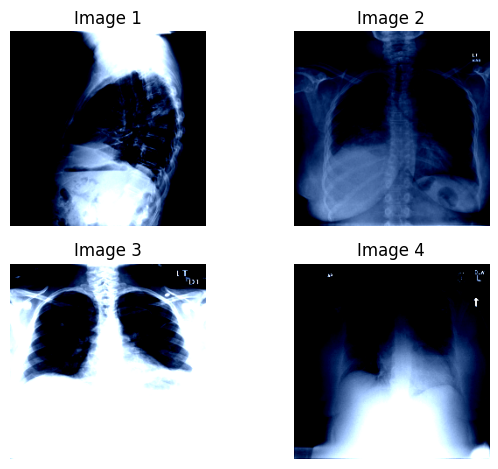

In [23]:
# Create sample images
image1 = load_image('./NLMCXR_png/CXR1016_IM-0013-2001.png')
image2 = load_image('./NLMCXR_png/CXR1064_IM-0045-1001.png')
image3 = load_image('./NLMCXR_png/CXR105_IM-0037-1001.png')
image4 = load_image('./NLMCXR_png/CXR1105_IM-0072-1001-0001.png')

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2)

# Plot first image in the first subplot
axes[0, 0].imshow(image1[0], cmap='gray')
axes[0, 0].set_title('Image 1')
axes[0, 0].axis('off')

# Plot second image in the second subplot
axes[0, 1].imshow(image2[0], cmap='gray')
axes[0, 1].set_title('Image 2')
axes[0, 1].axis('off')

# Plot third image in the third subplot
axes[1, 0].imshow(image3[0], cmap='gray')
axes[1, 0].set_title('Image 3')
axes[1, 0].axis('off')

# Plot fourth image in the fourth subplot
axes[1, 1].imshow(image4[0], cmap='gray')
axes[1, 1].set_title('Image 4')
axes[1, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#loadind pretrained weights for ChexNet model
model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')
chexNet = Model(inputs = model.input, outputs = model.layers[-2].output)
chexNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
Xnet_features = {}
for key, img1, img2, finding in tqdm(train_data.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1,verbose=0)
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2,verbose=0)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

for key, img1, img2, finding in tqdm(test_data.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1,verbose=0)
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2,verbose=0)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

for key, img1, img2, finding in tqdm(cv_data.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1,verbose=0)
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2,verbose=0)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 547/547 [02:57<00:00,  3.07it/s]


Encoder Decoder Model

In [ ]:
X_train = train_data['Person_id']
X_test = test_data['Person_id']
X_cv = cv_data['Person_id']
y_train = train_data['Report']
y_test =  test_data['Report']
y_cv =  cv_data['Report']

In [ ]:
cheXnet_Features = Xnet_features
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)

In [ ]:
pading_size = 153   # Max length
vocab_size = len(tokenizer.word_index.keys()) + 1

In [24]:
#@title Downloading and Importing Glove vectors
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d /content/glove_vector

glove_vectors = {}

with open('./glove_vector/glove.6B.300d.txt', 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

--2023-08-14 15:23:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-08-14 15:23:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-08-14 15:23:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Bellow we will use Glove vectors to get embedding of the words

In [ ]:
#@title Use Glove Vectors to get embeddings for words in it
embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors.keys():
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [ ]:
BATCH_SIZE = 12

def dataset_generator(img_name, caption):

    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))

  # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = cheXnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

In [ ]:
train_generator = dataset_generator(X_train, y_train)
cv_generator = dataset_generator(X_cv, y_cv)

In [ ]:
def bytes_to_string(arr):
    # The generator gives provides data in bytes. This function converts them back to strings for manipulation
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

In [ ]:
def convert(images, reports):
    # This function takes the batch of data and converts them into a new dataset
    imgs = []
    in_reports = []
    out_reports = []
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]
      #  print(sequence)
        for j in range(1,len(sequence)):

            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
          #  print(in_seq)
            in_reports.append(in_seq)
           # print(out_seq)
            out_reports.append(out_seq)
    # print(in_reports)
    return np.array(imgs), np.array(in_reports), np.array(out_reports)

In [ ]:
#@title LSTM encoder decoder
input1 = Input(shape=(2048), name='Image_input')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

input2 = Input(shape=(153), name='Text_Input')
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=153, mask_zero=True, trainable=False,
                weights=[embedding_matrix], name="Embedding_layer")
emb = embedding_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text_Input (InputLayer)        [(None, 153)]        0           []                               
                                                                                                  
 Embedding_layer (Embedding)    (None, 153, 300)     431100      ['Text_Input[0][0]']             
                                                                                                  
 LSTM1 (LSTM)                   (None, 153, 256)     570368      ['Embedding_layer[0][0]']        
                                                                                                  
 Image_input (InputLayer)       [(None, 2048)]       0           []                               
                                                                                            

In [ ]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    #calculating the loss
    loss_ = loss_function(y_true, y_pred)

    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)

    #applying the mask to loss
    loss_ = loss_*mask

    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
encoder_decoder.compile(optimizer, loss = maskedLoss)

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [ ]:
#@title Encoder Decoder training
#training for 20 epochs
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(20):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_tr = 0
    batch_loss_vl = 0

    for img, report in train_generator:

        r1 = bytes_to_string(report.numpy())
        # print(img.numpy().shape)
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')

        results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)

        batch_loss_tr += results

    train_loss = batch_loss_tr/(X_train.shape[0]//14)
 #   print('Saving Tensorboard')
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)

    for img, report in cv_generator:

        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
        batch_loss_vl += results

    val_loss = batch_loss_vl/(X_cv.shape[0]//14)

    with val_summary_writer.as_default():
        tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    epoch_val_loss.append(val_loss)

    print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))
    encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')
    print('--------------------------------------------------------------------------------------------')

EPOCH :  1
Training Loss: 0.0031396190505333698,  Val Loss: 0.0024968387845617076
Time Taken for this Epoch : 24.976622581481934 sec
--------------------------------------------------------------------------------------------
EPOCH :  2
Training Loss: 0.0024225975138680877,  Val Loss: 0.0020513609290505066
Time Taken for this Epoch : 19.034331560134888 sec
--------------------------------------------------------------------------------------------
EPOCH :  3
Training Loss: 0.0020882461297636232,  Val Loss: 0.0018239147417868178
Time Taken for this Epoch : 19.199554681777954 sec
--------------------------------------------------------------------------------------------
EPOCH :  4
Training Loss: 0.0019039705429800004,  Val Loss: 0.0017283368058717595
Time Taken for this Epoch : 19.2841317653656 sec
--------------------------------------------------------------------------------------------
EPOCH :  5
Training Loss: 0.0017761109188678815,  Val Loss: 0.0016852555339797758
Time Taken for t

Text(0.5, 1.0, 'Loss per epoch')

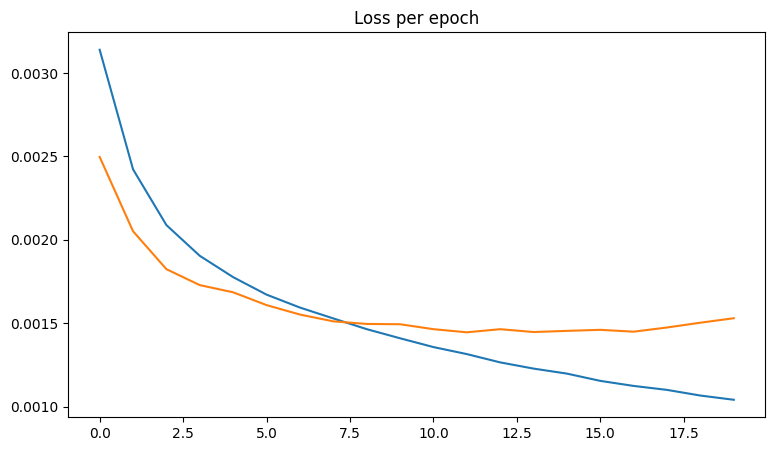

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)

plt.title('Loss per epoch')

In [ ]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder#
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)

In [ ]:
#@title greedy search
def greedysearch(img):
    image = cheXnet_Features[img]
    input_ = 'startseq'
    image_features = encoder_model.predict(image)

    result = []
    for i in range(153):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 153, padding='post')
        predictions = decoder_model.predict([input_padded, image_features],verbose=0)
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [ ]:
def get_result(idx=0):

  plt.figure(figsize=(9,5))

  pre_Report = greedysearch(cv_data['Person_id'][idx]) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cv_data['Report'][idx])

  plt.subplot(121)
  img = load_image(cv_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image(cv_data['Image2'][idx])
  plt.imshow(img[0])

1/1 [==============================] - 0s 37ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear without evidence infiltrate . there no pneumothora pleural effusion .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq heart size within normal limits stable mediastinal and hilar contours .  no focal alveolar consolidation no definite pleural effusion seen .  no typical findings pulmonary edema .  no pneumothora .  endseq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


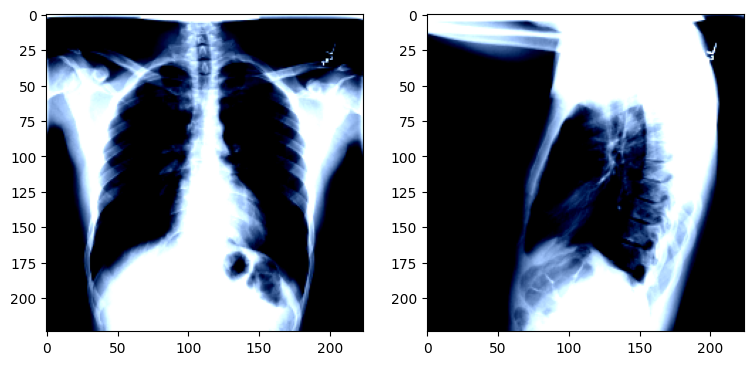

In [ ]:
get_result(2)

####Results:


1/1 [==============================] - 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear without evidence infiltrate . there no pneumothora pleural effusion .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq the cardiac and mediastinal contours are within normal limits .  the lungs are wellinflated and clear .  there nodule the left lower lobe calcified granuloma .  there no pneumothora effusion .  bony structures the thora are intact with minimal early degenerative change .  endseq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


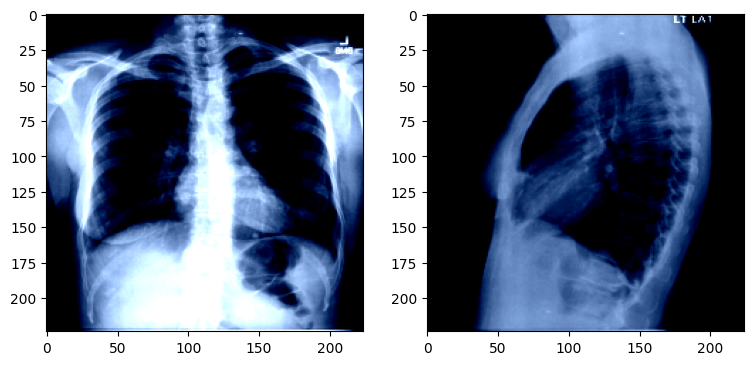

In [ ]:
get_result(98)

The actual result:

the cardiac and mediastinal contours are within normal limits .  the lungs are wellinflated and clear .  there nodule the left lower lobe calcified granuloma .  there no pneumothora effusion .  bony structures the thora are intact with minimal early degenerative change .

Predicted result:


the heart normal size . the mediastinum unremarkable . the lungs are clear without evidence infiltrate . there no pneumothora pleural effusion .

1/1 [==============================] - 0s 38ms/step
------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq cardiomediastinal silhouette normal .  pulmonary vasculature and are normal .  no consolidation pneumothora large pleural effusion .  osseous structures and soft tissues are normal .  endseq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


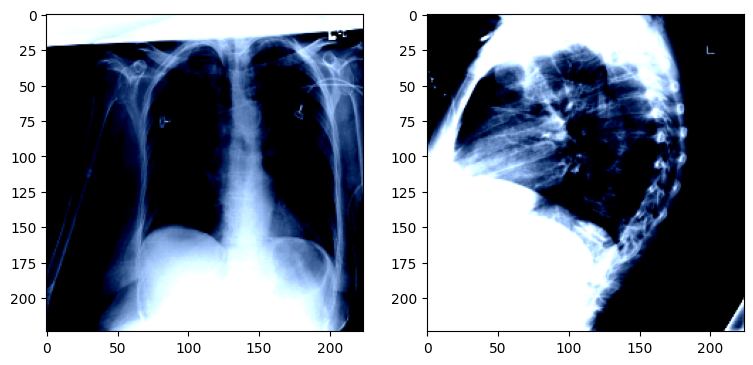

In [ ]:
get_result(48)

The actual result:

startseq cardiomediastinal silhouette normal .  pulmonary vasculature and are normal .  no consolidation pneumothora large pleural effusion .  osseous structures and soft tissues are normal .

Predicted result:


the heart normal size . the mediastinum unremarkable . the lungs are clear .

# Blue Score

In [ ]:
#@title Remove full stops
def rem_fullstops(text):
    #Removes punctuations
    punctuations = '''.''' # full stop is not removed
    new_text = []
    for char in text:
        if char in punctuations:
            text = text.replace(char, "")
    new_text.append(' '.join(e for e in text.split()))
    return new_text[0]

## CV

In [ ]:
#@title Bleu is calculated for Cross Validation
from tqdm.notebook import tqdm

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

In [ ]:

a = sum(bleu1)/X_cv.shape[0]
b = sum(bleu2)/X_cv.shape[0]
c = sum(bleu3)/X_cv.shape[0]
d = sum(bleu4)/X_cv.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

Bleu1 Score:  0.28565724313762153
Bleu2 Score:  0.16422531502295276
Bleu3 Score:  0.09757186725917237
Bleu4 Score:  0.05034371889315907
-----------------------------------------------------------------------
Avg Blue score: 0.14944953607822642


## Test

In [ ]:
#@title Bleu is calculated for Cross Test data
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_test.values, y_test.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

1/1 [==============================] - 0s 39ms/step


In [ ]:
a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

Bleu1 Score:  0.273128184194642
Bleu2 Score:  0.16195075393784295
Bleu3 Score:  0.1008259410018805
Bleu4 Score:  0.05701741225594473
-----------------------------------------------------------------------
Avg Blue score: 0.14823057284757754


# Beamsearch

In [ ]:
# beam_width = 2
def beamsearch(image, beam_width = 2):

    start = [tokenizer.word_index['startseq']]

    sequences = [[start, 0]]

    img_features = cheXnet_Features[image]
    img_features = encoder_model.predict(img_features)
    finished_seq = []

    for i in range(153):
        all_candidates = []
        new_seq = []

        for s in sequences:

            text_input = pad_sequences([s[0]], 153, padding='post')
            predictions = decoder_model.predict([text_input,img_features],verbose=0)
            top_words = np.argsort(predictions[0])[-beam_width:]
            seq, score = s

            for t in top_words:
                candidates = [seq + [t], score - np.log(predictions[0][t])]
                all_candidates.append(candidates)

        sequences = sorted(all_candidates, key = lambda l: l[1])[:beam_width]

        # checks for 'endseq' in each seq in the beam
        count = 0
        for seq,score in sequences:
            if seq[len(seq)-1] == tokenizer.word_index['endseq']:
                score = score/len(seq)   # normalized
                finished_seq.append([seq, score])
                count+=1
            else:
                new_seq.append([seq, score])
        beam_width -= count
        sequences = new_seq

        # if all the sequences reaches its end before 155 timesteps
        if not sequences:
            break
        else:
            continue

    sequences = finished_seq[-1]
    rep = sequences[0]
    score = sequences[1]
    temp = []
    rep.pop(0)
    for word in rep:
        if word != tokenizer.word_index['endseq']:
            temp.append(tokenizer.index_word[word])
        else:
            break
    rep = ' '.join(e for e in temp)

    return rep, score

In [ ]:
def get_result(beam_width,idx=0):

  plt.figure(figsize=(9,5))

  pre_Report,Score = beamsearch(cv_data['Person_id'][idx],beam_width) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('Score is :',Score)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cv_data['Report'][idx])

  plt.subplot(121)
  img = load_image(cv_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image(cv_data['Image2'][idx])
  plt.imshow(img[0])

1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear without evidence infiltrate . there no pneumothora pleural effusion .
Score is : 0.4645929703116417
------------------------------------------------------------------------------------------------------
Actual Report :  startseq heart size normal .  lungs are clear .  are normal .  no pneumonia effusions edema pneumothora adenopathy nodules masses .  endseq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


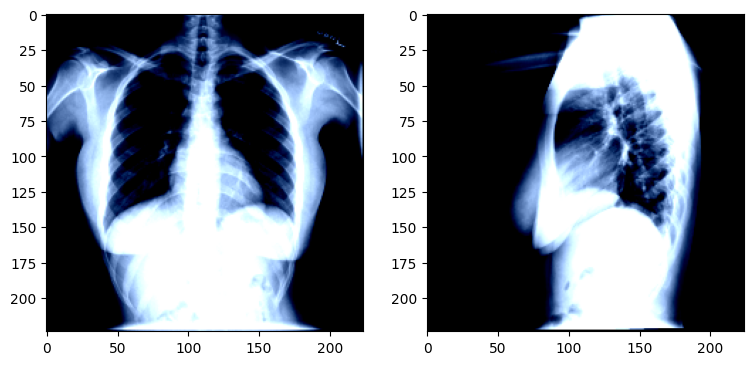

In [ ]:
# beam_width = 2
get_result(2,5)

1/1 [==============================] - 0s 39ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear without evidence infiltrate . there no pneumothora effusion .
Score is : 0.5263477549112091
------------------------------------------------------------------------------------------------------
Actual Report :  startseq normal heart size and mediastinal contours .  low lung volumes mild bibasilar atelectasis .  no focal airspace consolidation .  no pleural effusion pneumothora .  visualized osseous structures are unremarkable appearance .  the lateral views are limited patient positioning and motion .  large cervical spine osteophytes .  endseq


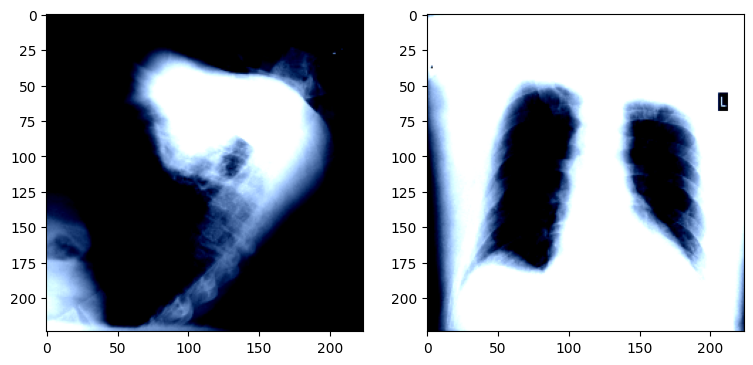

In [ ]:
# beam_width = 2
get_result(2,7)

In [ ]:
from tqdm.notebook import tqdm
from IPython.display import clear_output


# beam_width = 2
'''CV'''

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
k=0
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):
    k+=1
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,2)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))
    if k%100==0:
        print(k)
        clear_output()
        k=0

In [ ]:

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('CV Bleu1 Score: ',a)
print('CV Bleu2 Score: ',b)
print('CV Bleu3 Score: ',c)
print('CV Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg CV Blue score:",(a+b+c+d)/4)

print('=====================================================================================')

CV Bleu1 Score:  0.44103113273165584
CV Bleu2 Score:  0.24901757380682005
CV Bleu3 Score:  0.140966552794079
CV Bleu4 Score:  0.07943636441350915
-----------------------------------------------------------------------
Avg CV Blue score: 0.227612905936516


In [ ]:
# beam_width = 2
'''TEST'''
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []

for img, rep in tqdm(zip(X_test.values, y_test.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,2)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

1/1 [==============================] - 0s 41ms/step


In [ ]:
a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)

Test Bleu1 Score:  0.31145583312453
Test Bleu2 Score:  0.18473508166334227
Test Bleu3 Score:  0.10902654581502116
Test Bleu4 Score:  0.06416297943729625
-----------------------------------------------------------------------
Avg Test Blue score: 0.1673451100100474


In [ ]:
from tqdm.notebook import tqdm
# beam_width = 5
'''CV'''

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,5)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

1/1 [==============================] - 0s 45ms/step


In [ ]:


a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('CV Bleu1 Score: ',a)
print('CV Bleu2 Score: ',b)
print('CV Bleu3 Score: ',c)
print('CV Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg CV Blue score:",(a+b+c+d)/4)

print('=====================================================================================')

CV Bleu1 Score:  0.4127868776209259
CV Bleu2 Score:  0.22529053404696056
CV Bleu3 Score:  0.1273675304816053
CV Bleu4 Score:  0.06029139631888706
-----------------------------------------------------------------------
Avg CV Blue score: 0.2064340846170947


In [ ]:
# beam_width = 5
'''TEST'''
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []

for img, rep in tqdm(zip(X_test.values, y_test.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,5)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))


0it [00:00, ?it/s]

1/1 [==============================] - 0s 27ms/step


In [ ]:

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)

Test Bleu1 Score:  0.29481719212934904
Test Bleu2 Score:  0.15804616302778862
Test Bleu3 Score:  0.09192868950633944
Test Bleu4 Score:  0.05035101227446518
-----------------------------------------------------------------------
Avg Test Blue score: 0.14878576423448556


In [ ]:
from tqdm.notebook import tqdm
# beam_width = 7
'''CV'''

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,7)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

1/1 [==============================] - 0s 73ms/step


In [ ]:
a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('CV Bleu1 Score: ',a)
print('CV Bleu2 Score: ',b)
print('CV Bleu3 Score: ',c)
print('CV Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg CV Blue score:",(a+b+c+d)/4)

print('=====================================================================================')

CV Bleu1 Score:  0.4116720159031057
CV Bleu2 Score:  0.224885100800788
CV Bleu3 Score:  0.12793576035099904
CV Bleu4 Score:  0.06171291369430449
-----------------------------------------------------------------------
Avg CV Blue score: 0.20655144768729933


In [ ]:
# beam_width = 7
'''TEST'''
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []

for img, rep in tqdm(zip(X_test.values, y_test.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,7)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

1/1 [==============================] - 0s 61ms/step


In [ ]:
a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)

Test Bleu1 Score:  0.29799946104510316
Test Bleu2 Score:  0.16242681950508847
Test Bleu3 Score:  0.09576556436864703
Test Bleu4 Score:  0.05222363847451817
-----------------------------------------------------------------------
Avg Test Blue score: 0.1521038708483392


1/1 [==============================] - 0s 78ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------------------------------------------------------------------------------------------------------
Predicted Report :  the lungs are clear bilaterally . specifically no evidence focal consolidation pneumothora pleural effusion . cardio mediastinal silhouette unremarkable . visualized osseous structures the thora are without acute abnormality . there are degenerative changes the spine .
Score is : 0.3999561551385201
------------------------------------------------------------------------------------------------------
Actual Report :  startseq heart size normal .  lungs are clear .  are normal .  no pneumonia effusions edema pneumothora adenopathy nodules masses .  endseq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


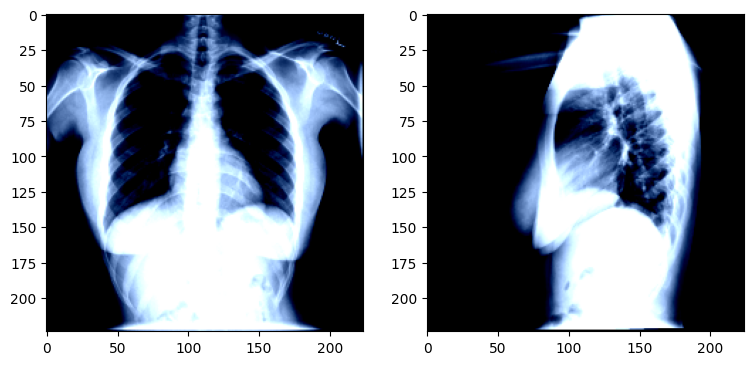

In [ ]:
get_result(5,5)

1/1 [==============================] - 0s 73ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------------------------------------------------------------------------------------------------------
Predicted Report :  the lungs are clear bilaterally . specifically no evidence focal consolidation pneumothora pleural effusion . cardio mediastinal silhouette unremarkable . visualized osseous structures the thora are without acute abnormality . there are degenerative changes the thoracic spine .
Score is : 0.4386439261492342
------------------------------------------------------------------------------------------------------
Actual Report :  startseq normal heart size and mediastinal contours .  low lung volumes mild bibasilar atelectasis .  no focal airspace consolidation .  no pleural effusion pneumothora .  visualized osseous structures are unremarkable appearance .  the lateral views are limited patient positioning and motion .  large cervical spine osteophytes .  endseq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


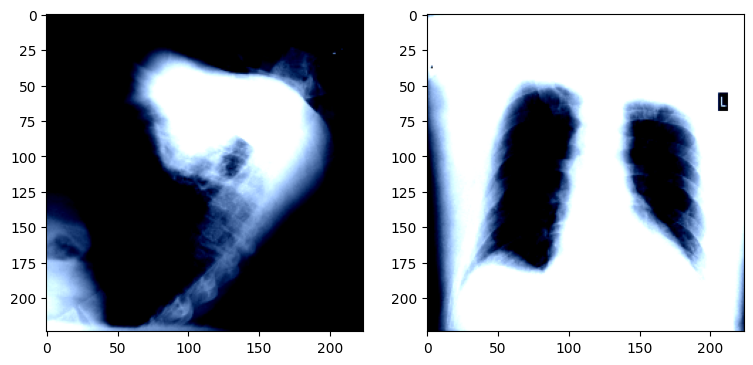

In [ ]:
get_result(5,7)

1/1 [==============================] - 0s 62ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------------------------------------------------------------------------------------------------------
Predicted Report :  the lungs are clear bilaterally . specifically no evidence focal consolidation pneumothora pleural effusion . cardio mediastinal silhouette unremarkable . visualized osseous structures the thora are clear without acute abnormality .
Score is : 0.3698118069406712
------------------------------------------------------------------------------------------------------
Actual Report :  startseq the heart and lungs have the interval .  both lungs are clear and epanded .  heart and mediastinum normal .  endseq


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


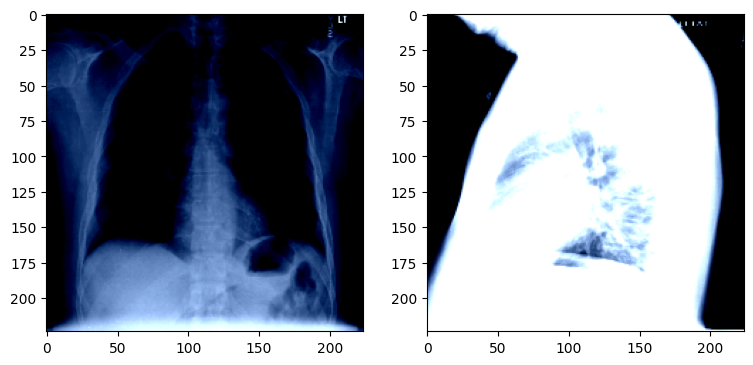

In [ ]:
get_result(5,21)

# Using ChexNet pretrained model to extarct features from images to be used in transfer learning for Attention model


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm
import tensorflow as tf
import cv2
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D,Concatenate,Flatten,Add,Dropout,GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu
from math import log

In [ ]:
train_dataset = pd.read_csv('./Final_Train_Data.csv')
cv_dataset = pd.read_csv('./Final_CV_Data.csv')
test_dataset = pd.read_csv('./Final_Test_Data.csv')

In [ ]:
chexNet = chex = densenet.DenseNet121(include_top=False, weights = None, input_shape=(224,224,3))
X = chexNet.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
chexNet = Model(inputs=chexNet.input, outputs=X)

In [ ]:
chexNet.load_weights('./brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [ ]:
model = Model(inputs = chexNet.input, outputs = chexNet.layers[-2].output)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True, dpi = 42)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


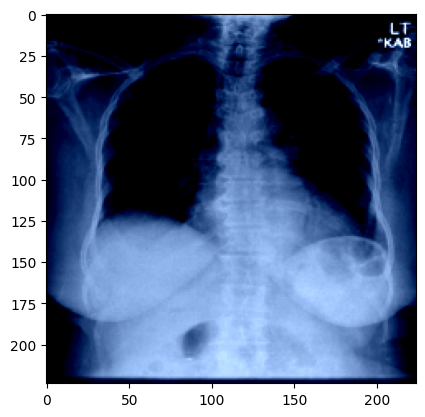

In [ ]:
img = load_image('NLMCXR_png/CXR1082_IM-0058-1001.png')
plt.imshow(img[0])

In [ ]:
from tqdm import tqdm_notebook as tqdm

def image_features(train, test, cv):
    Xnet_features_attention = {}

    for key, img1, img2, finding in tqdm(train.values):
        i1 = load_image(img1)
        img1_features = model.predict(i1)

        i2 = load_image(img2)
        img2_features = model.predict(i2)

        input_ = np.concatenate((img1_features, img2_features), axis=2)
        input_ = tf.reshape(input_, (input_.shape[0], -1, input_.shape[-1]))

        Xnet_features_attention[key] = input_

    for key, img1, img2, finding in tqdm(test.values):
        i1 = load_image(img1)
        img1_features = model.predict(i1)

        i2 = load_image(img2)
        img2_features = model.predict(i2)

        input_ = np.concatenate((img1_features, img2_features), axis=2)
        input_ = tf.reshape(input_, (input_.shape[0], -1, input_.shape[-1]))

        Xnet_features_attention[key] = input_

    for key, img1, img2, finding in tqdm(cv.values):
        i1 = load_image(img1)
        img1_features = model.predict(i1)

        i2 = load_image(img2)
        img2_features = model.predict(i2)

        input_ = np.concatenate((img1_features, img2_features), axis=2)
        input_ = tf.reshape(input_, (input_.shape[0], -1, input_.shape[-1]))

        Xnet_features_attention[key] = input_

    return Xnet_features_attention

In [ ]:
Xnet_features_attention = image_features(train_dataset, test_dataset, cv_dataset)

  0%|          | 0/2777 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


  0%|          | 0/383 [00:00<?, ?it/s]

1/1 [==============================] - 0s 63ms/step


  0%|          | 0/547 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step


In [ ]:
546 % 14

0

In [ ]:
Xnet_features_attention['NLMCXR_png/CXR1796_IM-0517_0'].shape

TensorShape([1, 98, 1024])

In [ ]:
# save the file for future use
f = open('Image_features_for_attention_model.pickle','wb')
pickle.dump(Xnet_features_attention, f)
f.close()

In [ ]:
X_train = train_dataset['Person_id'][:2758]
X_test = test_dataset['Person_id'][:378]
X_cv = cv_dataset['Person_id'][:546]
y_train = train_dataset['Report'][:2758]
y_test = test_dataset['Report'][:378]
y_cv = cv_dataset['Report'][:546]

In [ ]:
max_capt_len = 153
pad_size = max_capt_len

tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)

train_rep_tok = tokenizer.texts_to_sequences(y_train)
cv_rep_tok = tokenizer.texts_to_sequences(y_cv)
test_rep_tok = tokenizer.texts_to_sequences(y_test)

train_rep_padded = pad_sequences(train_rep_tok, maxlen=153, padding='post')
cv_rep_padded = pad_sequences(cv_rep_tok, maxlen=153, padding='post')
test_rep_padded = pad_sequences(test_rep_tok, maxlen=153, padding='post')

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [ ]:
BATCH_SIZE = 14
BUFFER_SIZE = 500

In [ ]:
a = Xnet_features_attention['NLMCXR_png/CXR1796_IM-0517_0'][0]
a.shape

TensorShape([98, 1024])

In [ ]:
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = Xnet_features_attention[id_.decode('utf-8')][0]
    return img_feature, report

In [ ]:
def dataset_generator(img_name_train,reps):

  dataset = tf.data.Dataset.from_tensor_slices((img_name_train, reps))
  # Use map to load the numpy files in parallel
  dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.int32]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
  dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return dataset

In [ ]:
cv_rep_padded.shape

(546, 153)

In [ ]:
train_generator = dataset_generator(X_train.values, train_rep_padded)
cv_generator = dataset_generator(X_cv.values, cv_rep_padded)

In [ ]:
glove_vectors = {}

with open('./glove_vector/glove.6B.300d.txt', 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

In [ ]:
vocab_size = len(tokenizer.word_index.keys()) + 1

embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors.keys():
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Encoder, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.maxpool = tf.keras.layers.MaxPool1D()
        self.dense = Dense(self.units, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')

    def call(self, input_, training=True):

        x = self.maxpool(input_)
        x = self.dense(x)

        return x

    def get_states(self, bs):

        return tf.zeros((bs, self.units))

In [ ]:
class Decoder(tf.keras.layers.Layer):

    def __init__(self, vocab_size, input_length, dec_units, att_units):
        super(Decoder, self).__init__()
        self.vocab_size = vocab_size
        self.input_length = input_length
        self.dec_units = dec_units
        self.att_units = att_units
        self.onestep_decoder = OneStepDecoder(self.vocab_size, self.att_units, self.dec_units)
    @tf.function
    def call(self, dec_input, hidden_state, enc_output):
        all_outputs = tf.TensorArray(tf.float32, dec_input.shape[1], name='output_arrays')

        for timestep in range(dec_input.shape[1]):

            output, hidden_state, attention_weights = self.onestep_decoder(dec_input[:, timestep:timestep+1],
                                                                           hidden_state, enc_output)

            all_outputs = all_outputs.write(timestep, output)

        all_outputs = tf.transpose(all_outputs.stack(), [1,0,2])
        return all_outputs

        return tf.zeros((bs, self.units))

In [ ]:
class OneStepDecoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, att_units, dec_units):
        super(OneStepDecoder, self).__init__()
        self.vocab_size = vocab_size
        self.att_units = att_units
        self.dec_units = dec_units

    def build(self, input_shape):
        self.embedding = Embedding(self.vocab_size, output_dim=300, input_length=max_capt_len, mask_zero=True,
                                   weights = [embedding_matrix],
                                   name="embedding_layer_decoder")
        self.gru = GRU(self.dec_units, return_sequences=True, return_state=True, name="Decoder_GRU")
        self.fc = Dense(self.vocab_size)

        self.V = Dense(1)
        self.W = Dense(self.att_units)
        self.U = Dense(self.att_units)

    def call(self, dec_input, hidden_state, enc_output):

        hidden_with_time = tf.expand_dims(hidden_state, 1)
        attention_weights = self.V(tf.nn.tanh(self.U(enc_output) + self.W(hidden_with_time)))
        attention_weights = tf.nn.softmax(attention_weights, 1)
        context_vector = attention_weights * enc_output
        context_vector = tf.reduce_sum(context_vector, axis=1)

        x = self.embedding(dec_input)
        x = tf.concat([tf.expand_dims(context_vector, axis=1),x], axis=-1)
        output, h_state = self.gru(x, initial_state = hidden_state)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)

        return x, h_state, attention_weights

In [ ]:
class Attention_Model(tf.keras.Model):
    def __init__(self, vocab, units, max_capt_len, att_units, batch_size):
        super(Attention_Model, self).__init__()
        self.batch_size = batch_size
        self.encoder = Encoder(units)
        self.decoder = Decoder(vocab_size, max_capt_len, units, att_units)

    def call(self, data):
        enc_input, dec_input = data[0], data[1]

        enc_output = self.encoder(enc_input)
        enc_state = self.encoder.get_states(self.batch_size)
        dec_output = self.decoder(dec_input, enc_state, enc_output)

        return dec_output

In [ ]:
units = 256
att_units = 10

In [ ]:
model_atten = Attention_Model(vocab_size, units, max_capt_len, att_units, BATCH_SIZE)

In [ ]:
tf.keras.utils.plot_model(model_atten,show_shapes=True,expand_nested=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    #calculating the loss
    loss_ = loss_function(y_true, y_pred)

    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)

    #applying the mask to loss
    loss_ = loss_*mask

    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [ ]:
model_atten.compile(optimizer=optimizer, loss=maskedLoss)

In [ ]:
EPOCHS = 10

In [ ]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/attention_OneStep/fit2/' + current_time + '/train'
val_log_dir = 'Tensorboard/attention_OneStep/fit2/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [ ]:
for img, rep in cv_generator:
  print(img.shape,rep.shape)

In [ ]:
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(15):
    start = time.time()
    print("EPOCH: ", epoch+1)
    batch_loss_tr = 0
    batch_loss_val = 0

    for img, rep in train_generator:
        res = model_atten.train_on_batch([img, rep[:,:-1]], rep[:,1:])
        batch_loss_tr += res

    train_loss = batch_loss_tr/(X_train.shape[0]/BATCH_SIZE)

    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)

    for img, rep in cv_generator:
        res = model_atten.test_on_batch([img, rep[:,:-1]], rep[:,1:])
        batch_loss_val += res

    val_loss = batch_loss_val/(X_cv.shape[0]/BATCH_SIZE)

    with val_summary_writer.as_default():
        tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    epoch_val_loss.append(val_loss)

    print('Training Loss: {},  Validation Loss: {}'.format(train_loss, val_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))
    model_atten.save_weights('epoch_'+ str(epoch+1) + '.h5')
    print('---------------------------------------------------------------------------------')

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)

plt.title('Loss per epoch')

In [ ]:
model_atten.summary()

In [ ]:
def beam_search(image, beam_width = 3):
    """Beam search implementaion takes images as input"""
    image_features = Xnet_features_attention[image]

    features_val = encoder(image_features)
    start = [tokenizer.word_index["<start>"]]
    dec_word = [[start, 0.0]]
    finished_cap = []
    while len(dec_word[0][0]) < max_doc_length_x:
        temp = []
        new_cap = []
        for s in dec_word:

            predictions, hidden,attention_weights = decoder(tf.cast(tf.expand_dims([s[0][-1]], 0), tf.int32), features_val, hidden)
            predictions = tf.reshape(predictions, [predictions.shape[0],predictions.shape[2]])

            word_preds = np.argsort(predictions[0])[-beam_width:]
            cap,score = s
            for w in word_preds:
                candidates = [cap + [w], score - log(predictions[0][w])]
                temp.append(candidates)
        dec_word = sorted(temp, key = lambda l: l[1])[:beam_width]
        count = 0
        for cap,score in dec_word:
          if cap[len(cap)-1] == tokenizer.word_index['<end>']:
            score = score/len(cap)
            finished_cap.append([cap, score])
            count+=1
          else:
            new_cap.append([cap, score])
        beam_width -= count
        dec_word = new_cap
        # if all the dec_word reaches its end before all timesteps
        if not dec_word:
          break
        else:
          continue
    dec_word = finished_cap[-1]
    text = dec_word[0]
    score = dec_word[1]
    result = []
    text.pop(0)
    for word in text:
      if word != tokenizer.word_index['<end>']:
        result.append(tokenizer.index_word[word])
      else:
        break
    text = ' '.join(e for e in result)

    return result, text

In [ ]:
def inference(inputs):

    in_ = len(inputs.split()) - 1
    inputs = Xnet_features_attention[inputs]
    enc_state = tf.zeros((1, 256))
    enc_output = model_atten.layers[0](inputs)
    input_state = enc_state
    pred = []
    cur_vec = np.array([tokenizer.word_index['startseq']]).reshape(-1,1)

    for i in range(153):

        inf_output, input_state, attention_weights = model_atten.layers[1].onestep_decoder(cur_vec, input_state, enc_output)

        cur_vec = np.reshape(np.argmax(inf_output), (1, 1))
        if cur_vec[0][0] != 0:
            pred.append(cur_vec)
        else:
            break

    output = ' '.join([tokenizer.index_word[e[0][0]] for e in pred if e[0][0] != 0 and e[0][0] != 7])
    return output

## CV

In [ ]:
%%capture
from tqdm.notebook import tqdm

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep = inference(img)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))



In [ ]:
a = sum(bleu1)/X_cv.shape[0]
b = sum(bleu2)/X_cv.shape[0]
c = sum(bleu3)/X_cv.shape[0]
d = sum(bleu4)/X_cv.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

## Test

In [ ]:
%%capture
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_test.values, y_test.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep = inference(img)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))



In [ ]:
a = sum(bleu1)/X_cv.shape[0]
b = sum(bleu2)/X_cv.shape[0]
c = sum(bleu3)/X_cv.shape[0]
d = sum(bleu4)/X_cv.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

In [ ]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

def get_result_attention_model(idx):
  plt.figure(figsize=(9,5))

  pre_Report = inference(cv_dataset['Person_id'][idx]) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cv_dataset['Report'][idx])

  plt.subplot(121)
  img = load_image(cv_dataset['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image(cv_dataset['Image2'][idx])
  plt.imshow(img[0])

In [ ]:
get_result_attention_model(72)

In [ ]:
get_result_attention_model(399)

In [ ]:
get_result_attention_model(34)

In [ ]:
get_result_attention_model(98)

In [ ]:
get_result_attention_model(13)

In [ ]:
def get_result(beam_width,idx=0):

  plt.figure(figsize=(9,5))

  pre_Report,Score = beamsearch(cv_data['Person_id'][idx],beam_width) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('Score is :',Score)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cv_data['Report'][idx])

  plt.subplot(121)
  img = load_image(cv_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image(cv_data['Image2'][idx])
  plt.imshow(img[0])

In [ ]:
#beam width = 10
get_result(10,5)

In [ ]:
#beam width = 10
get_result(5,5)

In [ ]:
#beam width = 10
get_result(10,11)

In [ ]:
#beam width = 10
get_result(10,39)

In [ ]:
#beam width = 10
get_result(10,117)

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Data","Avg_blue_score"]
x.add_row(["Encoder Decoder", "CV", 0.18114848876146578])
x.add_row(["","",""])
x.add_row(["", "Test", 0.1617484175657567])
x.add_row(["-----------------", "------------------","------------------"])


x.add_row(["Attention Mechanism", "CV",  0.199915143372483])
x.add_row(["","",""])
x.add_row(["", "Test", 0.12827193524412095])

print(x)

# Observations :
 1. With less epochs attention model is predicting same result.
 2. When number of epochs increased attention model is now performing better
 3. Attention model prediction using greedy search and beam search seems to be same. So to reduce the time complexity of the model it is wise to use greedy search for predicting output.
 4. Analyzing the performnce of both encoder decoder model and attention model,we can go for encoder decoder model as its is result is quite better using the beam search algorithm also the model complexity less.

# Future work:
1. we can use EfficientNetB7 pretrained model to extract features from the images and then implement out model on top of it.
2. Collecting more data samples in order to make this model more powerful is highly required.Our present model is not so accurate due to fewer dataset at hand.   